<a href="https://colab.research.google.com/github/lucas-fpaiva/AnalisePred_I/blob/main/Projeto/classifier_popularity_forro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Avaliar a popularidade de músicas de forro

In [11]:
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acs

from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.datasets import make_classification
from ast import literal_eval

import warnings
warnings.filterwarnings('ignore')


In [3]:
def norm_mm(arr):
    return (arr-np.min(arr))/(np.max(arr)-np.min(arr))

def padroniza(data):
    data['artist'] = norm_mm(data['artist_fac'])
    data['track_year'] = norm_mm(data['track_year'])
    data['tempo'] = norm_mm(data['tempo'])
    data['time_signature'] = norm_mm(data['time_signature'])
    data['key'] = norm_mm(data['key'])
    data['duration_ms'] = norm_mm(data['duration_ms'])
    data['loudness'] = norm_mm(data['loudness'])
  
    return data

In [27]:
def grid_best_model (model="DT", names=False, grid="", task="R"):
  #A função retorna o modelo com os melhores parametros, os melhores parametros e o melhor score
  scoring = 'accuracy'
  #models = ["KNN","LM","DT","SVM", "RF", "MLP", "GB", "ADA"]
  #types = ["C","R"]
  if names == True:
    print("KNN: KNeighborsRegressor\nLM: LinearRegression\nDT: DecisionTreeRegressor\nRF: RandomForestRegressor",
          "\nGB: GradientBoostingRegressor\nSVM: Support Vector Machine\nADA: AdaBoostRegressor\nMLP: MLPRegressor")
    
  if model == "DT":
    if task == "C":
      gs_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid['DT'], cv= 5, scoring=scoring)
      gs_cv.fit(x_treino, y_treino)
      return DecisionTreeClassifier(criterion=gs_cv.best_params_['criterion'], max_depth=gs_cv.best_params_['max_depth'], min_samples_leaf=gs_cv.best_params_['min_samples_leaf'], 
                                    random_state=gs_cv.best_params_['random_state']).fit(x_treino, y_treino), gs_cv.best_params_

    elif task == "R":
      gs_cv = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=grid['DT'], cv= 5, scoring=scoring, n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return DecisionTreeRegressor(criterion=gs_cv.best_params_['criterion'], max_depth=gs_cv.best_params_['max_depth'], min_samples_leaf=gs_cv.best_params_['min_samples_leaf'],
                                   random_state=gs_cv.best_params_['random_state']).fit(x_treino, y_treino), gs_cv.best_params_
        
  if model=="MLP":
    if task == "C":
      gs_cv = GridSearchCV(estimator=MLPClassifier(), param_grid=grid['MLP'], cv= 5, scoring=scoring, n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return MLPClassifier(hidden_layer_sizes=gs_cv.best_params_['hidden_layer_sizes'], max_iter=gs_cv.best_params_['max_iter'], activation=gs_cv.best_params_['activation'], 
                           random_state=gs_cv.best_params_['random_state']), gs_cv.best_params_
    elif task == "R":

      gs_cv = GridSearchCV(estimator=MLPRegressor(), param_grid=grid['MLP'], cv= 5, scoring=scoring, n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return MLPRegressor(early_stopping=True, hidden_layer_sizes=gs_cv.best_params_['hidden_layer_sizes'], max_iter=gs_cv.best_params_['max_iter'], activation=gs_cv.best_params_['activation'], 
                           random_state=gs_cv.best_params_['random_state']), gs_cv.best_params_
    
  if model == "RF":
    if task == "C":
      gs_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid['RF'], cv= 5, scoring=scoring, n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return RandomForestClassifier(n_estimators=gs_cv.best_params_['n_estimators'], max_depth=gs_cv.best_params_['max_depth'], max_features=gs_cv.best_params_['max_features'], 
                             random_state=gs_cv.best_params_['random_state'], criterion=gs_cv.best_params_['criterion']), gs_cv.best_params_

    elif task == "R":
      gs_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid['RF'], cv= 5, scoring=scoring, n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return RandomForestRegressor(n_estimators=gs_cv.best_params_['n_estimators'], max_features=gs_cv.best_params_['max_features'], 
                             random_state=gs_cv.best_params_['random_state'], criterion=gs_cv.best_params_['criterion']), gs_cv.best_params_

  if model == "KNN":
    if task == "C":
      gs_cv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid['KNN'], cv= 5, scoring=scoring, n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return KNeighborsClassifier(n_neighbors=gs_cv.best_params_['n_neighbors'], weights=gs_cv.best_params_['weights'], metric=gs_cv.best_params_['metric']), gs_cv.best_params_

    elif task == "R":
      gs_cv = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=grid['KNN'], cv= 5, scoring=scoring, n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return KNeighborsRegressor(n_neighbors=gs_cv.best_params_['n_neighbors'], weights=gs_cv.best_params_['weights'], metric=gs_cv.best_params_['metric']), gs_cv.best_params_

  if model == "LM":
    if task == "C":
      gs_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=grid['LM'], cv= 5, scoring=scoring, n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return LogisticRegression(fit_intercept=gs_cv.best_params_['fit_intercept']), gs_cv.best_params_

    elif task == "R":
      gs_cv = GridSearchCV(estimator=LinearRegression(), param_grid=grid['LM'], cv= 5, scoring=scoring, n_jobs=-1)
      gs_cv.fit(x_treino, y_treino)
      return LinearRegression(fit_intercept=gs_cv.best_params_['fit_intercept']), gs_cv.best_params_
        
  return print("KNN: KNeighborsRegressor\nLM: LinearRegression\nDT: DecisionTreeRegressor\nRF: RandomForestRegressor",
          "\nGB: GradientBoostingRegressor\nSVM: Support Vector Machine\nADA: AdaBoostRegressor\nMLP: MLPRegressor")
  
#Parâmetros do Grid
grid = {
    'RF':{ 
        'n_estimators': range(5,30,2),
        'max_depth' : range(5,30,2),
        'criterion' :['gini', 'entropy'],
        'random_state' : [0]},

    'MLP':{
        'hidden_layer_sizes': range(5,30,2),#[(10,), (15,), (20,), (30,)],
        'max_iter': [200],
        'activation' : ['relu', 'tanh'],
        'random_state' : [0]},

    'DT':{
        'max_depth': range(5,30,2),
        'min_samples_leaf': [1,2,3,4,5],
        'criterion' :['gini', 'entropy'],
        'random_state' : [0]},

    'KNN':{
      'n_neighbors': range(5,30,2),
      'weights': ['uniform', 'distance'],
      'metric' : ['manhattan', 'euclidean']},

    'LM':{
      'fit_intercept' : [True, False]}
}

## Lendo o Dataset

In [5]:
forroset = pd.read_csv('https://raw.githubusercontent.com/lucas-fpaiva/AnalisePred_I/main/Projeto/new_forroset.csv')
forroset.columns

Index(['Unnamed: 0', 'track', 'track_id', 'artist', 'artist_id', 'popularity',
       'album', 'album_id', 'track_year', 'duration_ms', 'uri', 'preview_url',
       'energy', 'liveness', 'tempo', 'speechiness', 'acousticness',
       'instrumentalness', 'time_signature', 'danceability', 'key', 'loudness',
       'valence', 'mode', 'artist_fac', 'fold', 'popularity_class'],
      dtype='object')

In [6]:
forroset = forroset[["track_id",'popularity_class', 'duration_ms','track_year', 'artist_fac','energy',
       'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness',
       'time_signature', 'danceability', 'key', 'loudness', 'valence', 'mode', 'fold']]

forroset = forroset.rename(columns={'popularity_class':'popularity'})

## Avaliando a Árvore de Decisão

In [ ]:
multilabel_confusion_matrix(true_labels, predictions, sample_weight=)

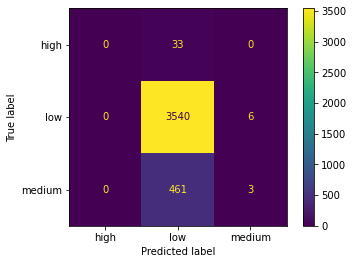

In [12]:
plot_confusion_matrix(model, x_teste, y_teste)

In [24]:
def get_accuracies(true_labels, predictions):
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html
    cm = multilabel_confusion_matrix(true_labels, predictions)
    total_count = true_labels.shape[0]
    accuracies = []
    for i in range(3):
        true_positive_count = np.sum(cm[i,1,1]).item()
        true_negative_count = np.sum(cm[i,0,0]).item()
        accuracy = (true_positive_count + true_negative_count) / total_count
        accuracies.append(accuracy)
    return accuracies

def metrics (y_true, y_pred):
  return [acs(y_true, y_pred), get_accuracies(y_true, y_pred), ps(y_true, y_pred, average = 'weighted'), 
          f1(y_true, y_pred, average = 'weighted'), rs(y_true, y_pred, average = 'weighted')]

Melhor parametro: {'fit_intercept': False}
Fold 1 [0.8763294583230274, [0.9918377442493198, 0.8763294583230274, 0.8844917140737076], 0.8079215202398051, 0.8206729710369837, 0.8763294583230274]


<Figure size 432x288 with 0 Axes>

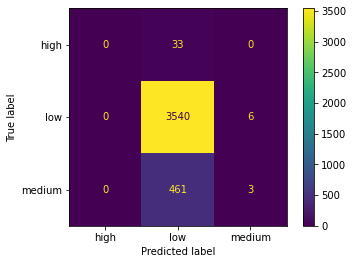

Melhor parametro: {'fit_intercept': False}
Fold 2 [0.8763294583230274, [0.9953005194162751, 0.8763294583230274, 0.8810289389067524], 0.8417096853980994, 0.82160865384133, 0.8763294583230274]


<Figure size 432x288 with 0 Axes>

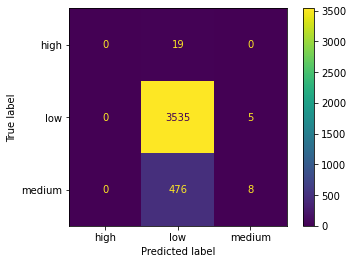

Melhor parametro: {'fit_intercept': False}
Fold 3 [0.8790202869866403, [0.991835724888669, 0.8790202869866403, 0.8871845620979713], 0.8151005310154954, 0.8263537025071508, 0.8790202869866403]


<Figure size 432x288 with 0 Axes>

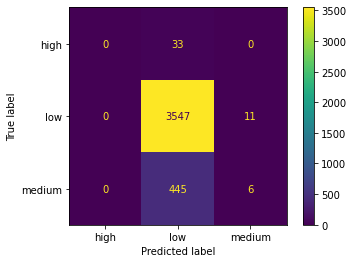

Melhor parametro: {'fit_intercept': False}
Fold 4 [0.8797624938149431, [0.9945571499257794, 0.8797624938149431, 0.8852053438891638], 0.8126841076053647, 0.8271948784530039, 0.8797624938149431]


<Figure size 432x288 with 0 Axes>

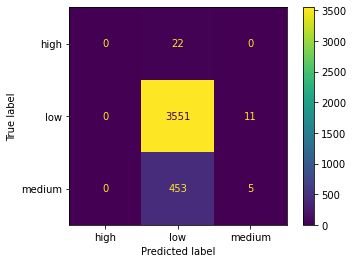

Melhor parametro: {'fit_intercept': True}
Fold 5 [0.8864423552696685, [0.9928253339930727, 0.8864423552696685, 0.8936170212765957], 0.8357730090916936, 0.8419236182787024, 0.8864423552696685]


<Figure size 432x288 with 0 Axes>

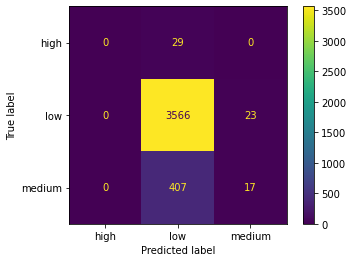

Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}
Fold 1 [0.9020529309918377, [0.9918377442493198, 0.9084837991590403, 0.9037843185753154], 0.8851875297249643, 0.885774617032373, 0.9020529309918377]


<Figure size 432x288 with 0 Axes>

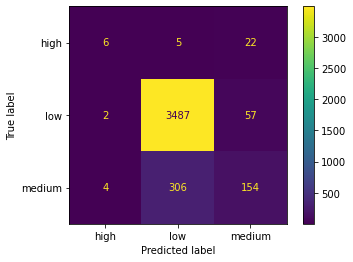

Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}
Fold 2 [0.9062577294088549, [0.9943111550828593, 0.9104625278258719, 0.9077417759089785], 0.894363602669918, 0.8912406180597662, 0.9062577294088549]


<Figure size 432x288 with 0 Axes>

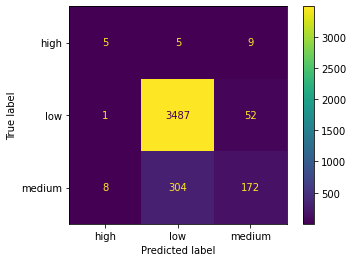

Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}
Fold 3 [0.909450766947056, [0.9938149430974765, 0.9141514101929737, 0.9109351806036615], 0.8968257200134574, 0.8961539703385769, 0.909450766947056]


<Figure size 432x288 with 0 Axes>

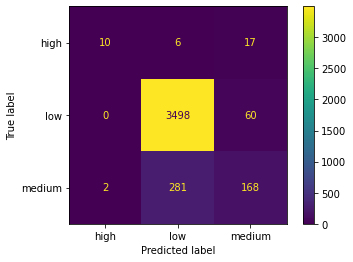

Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}
Fold 4 [0.9069767441860465, [0.9952993567540821, 0.9111825828797625, 0.9074715487382484], 0.8930576997595074, 0.8938924435650585, 0.9069767441860465]


<Figure size 432x288 with 0 Axes>

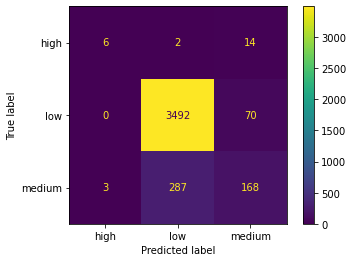

Melhor parametro: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}
Fold 5 [0.912914398812469, [0.9923305294408709, 0.9186046511627907, 0.9148936170212766], 0.8991218964878886, 0.9018551572667085, 0.912914398812469]


<Figure size 432x288 with 0 Axes>

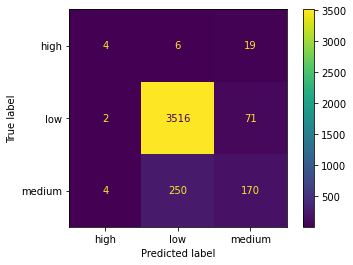

Melhor parametro: {'activation': 'relu', 'hidden_layer_sizes': 11, 'max_iter': 200, 'random_state': 0}
Fold 1 [0.8770714815730893, [0.9918377442493198, 0.8770714815730893, 0.8852337373237695], 0.8277866987958374, 0.8228876845545499, 0.8770714815730893]


<Figure size 432x288 with 0 Axes>

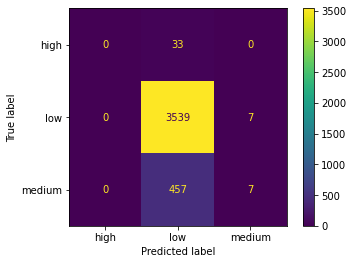

Melhor parametro: {'activation': 'relu', 'hidden_layer_sizes': 11, 'max_iter': 200, 'random_state': 0}
Fold 2 [0.8748454118229038, [0.9953005194162751, 0.8753400939896117, 0.8790502102399208], 0.8164757970778787, 0.8219033468575764, 0.8748454118229038]


<Figure size 432x288 with 0 Axes>

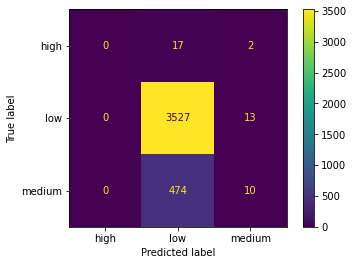

Melhor parametro: {'activation': 'relu', 'hidden_layer_sizes': 11, 'max_iter': 200, 'random_state': 0}
Fold 3 [0.8785254824344384, [0.991835724888669, 0.8790202869866403, 0.8861949529935675], 0.8052494900332101, 0.8258517508002646, 0.8785254824344384]


<Figure size 432x288 with 0 Axes>

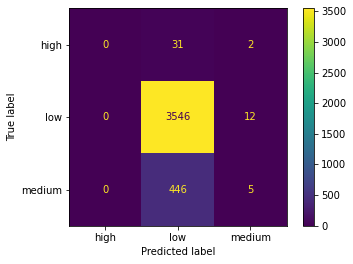

Melhor parametro: {'activation': 'relu', 'hidden_layer_sizes': 11, 'max_iter': 200, 'random_state': 0}
Fold 4 [0.880257298367145, [0.9945571499257794, 0.8805047006432459, 0.8854527461652647], 0.821187821452513, 0.8289006842622858, 0.880257298367145]


<Figure size 432x288 with 0 Axes>

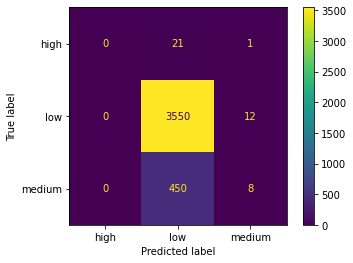

Melhor parametro: {'activation': 'relu', 'hidden_layer_sizes': 11, 'max_iter': 200, 'random_state': 0}
Fold 5 [0.8886689757545769, [0.9928253339930727, 0.8891637803067788, 0.8953488372093024], 0.8460172290554402, 0.8441912044823874, 0.8886689757545769]


<Figure size 432x288 with 0 Axes>

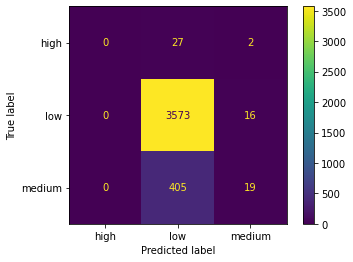

KeyError: ignored

In [29]:
data_results = pd.DataFrame([],columns=['accuracy', 'confusion_matrix', 'precision', 'f1_score','recall', 'fold','model','parameters'])
models = ["LM", "KNN", "MLP", "DT", "RF"]

for name_model in models:
  results = []
  for k in range(1,6):
    treino = forroset[forroset.fold!=k]
    teste  = forroset[forroset.fold==k]

    teste = padroniza(teste)
    treino = padroniza(treino)
    
    x_treino = treino.drop(['fold','track_id','popularity'], axis=1)
    y_treino = treino.popularity

    x_teste = teste.drop(['fold','track_id','popularity'], axis=1)
    y_teste = teste.popularity

    model, best_parameters = grid_best_model(model=name_model, grid=grid, task = "C")
    model.fit(x_treino, y_treino)
    y_pred= model.predict(x_teste)

    print("Melhor parametro:", best_parameters)         
    print("Fold", k, metrics(y_teste.values, y_pred))

    plt.figure()
    plot_confusion_matrix(model, x_teste, y_teste)
    plt.show()


    result = metrics(y_teste, y_pred)
    result.append(k)
    result.append(name_model)
    result.append(best_parameters)
    
    results.append(result)
        
  data_results = pd.concat([data_results, pd.DataFrame(results,columns=['accuracy', 'confusion_matrix', 'precision', 'f1_score','recall', 'fold','model','parameters'])])
  data_results.to_csv('/content/drive/MyDrive/AnalisePred_I/classifier_results_'+ name_model + '.csv')


In [ ]:
print(data_results['parameters'][4])

In [ ]:
data_results.mean()

### Predição do Modelo

In [ ]:
model.fit(x_treino, y_treino)
np.sqrt(model.score(x_treino, y_treino))

In [ ]:
model.score(x_teste, y_teste)

In [ ]:
y_pred_t = model.predict(x_treino)

In [ ]:
y_pred= model.predict(x_teste)

In [ ]:
plt.plot(y_treino, y_pred_t, 'o')

plt.plot(y_teste, y_pred, 'x')


#### MAPE

In [ ]:
mape(y_teste,y_pred)*100

In [ ]:
plt.plot(((y_teste.values - y_pred)/y_teste.values)*100)
np.mean(100*np.abs(y_teste.values - y_pred)/y_teste.values)

#### Plot do Modelo Teste x Treino

In [ ]:
plt.plot(y_teste.values, 'o')
plt.plot(y_pred, 'x')
plt.xlim([100,300])
plt.ylim([0,0.3])

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true+0.00001))) * 100

In [ ]:
def mae (y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [ ]:
def r2_score(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))